# Chapter 3 Exercises - Linear Regression
1. Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.

A: Null hypothesis 

2. Carefully explain the differences between the KNN classifier and KNN
regression methods.

A: The difference is how the result is calculated and interpreted. In KNN regression, the output is the average of the k-nearest neighbors and can have any value. On KNN classifier, the output is the probability that the input results in an output of a certain class; the result is a number between 0.5 and 1.

 
3. Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Level (1 for College and 0 for High School), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get β0 = 50, β1 = 20, β2 = 0.07, β3 = 35, β4 = 0.01, β5 =−10.

    (a) Which answer is correct, and why?
    i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.    
    ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
    iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.
    iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.
   
A: iv is true. People with high school education earn more if the GPA > 3.5. B5 has a negative impact on the salary for college graduates with high GPA. 

    (b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.
A: 50 + 20*4 + 0.07*110 + 35*1 + 0.01*4*110 - 10*4 = 137.1

    (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.
A: This is false, a small coefficient does not mean that the interaction effect is small, as the product of the two variables can be large. One would need to calculate p and the difference in R2 to termine if the effect is significant.

4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, 
   as well as a separate cubic regression, i.e. Y= β0 + β1X + β2X2 + β3X3 + ϵ.

    (a) Suppose that the true relationship between X and Y is linear, i.e. Y= β0 + β1X + ϵ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
A: The cubic regression will have a lower RSS as it's a more flexible model.
    
    (b) Answer (a) using test rather than training RSS.
A: The test error will be higher for the cubic regression due to overfitting.

    (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
A: The cubic regression should have a lower RSS as it's more flexible. 
 
    (d) Answer (c) using test rather than training RSS. 
A: It's not possible to say as it depends on how much the response deviates from a linear regression.
    
5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes
the form

7. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point (x,y).

A: When x = x̄ => b1 = 0 and b0 = ȳ => f(x̄) = ȳ 

8. It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic (3.17) is equal to the square of the correlation between X and Y (3.18). Prove that this is the case. For
simplicity, you may assume that x̄ = ȳ = 0.


## Applied

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from matplotlib.pyplot import subplots

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           7.03e-81
Time:                        11:44:44   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      39.9359      0.717     55.660      

115

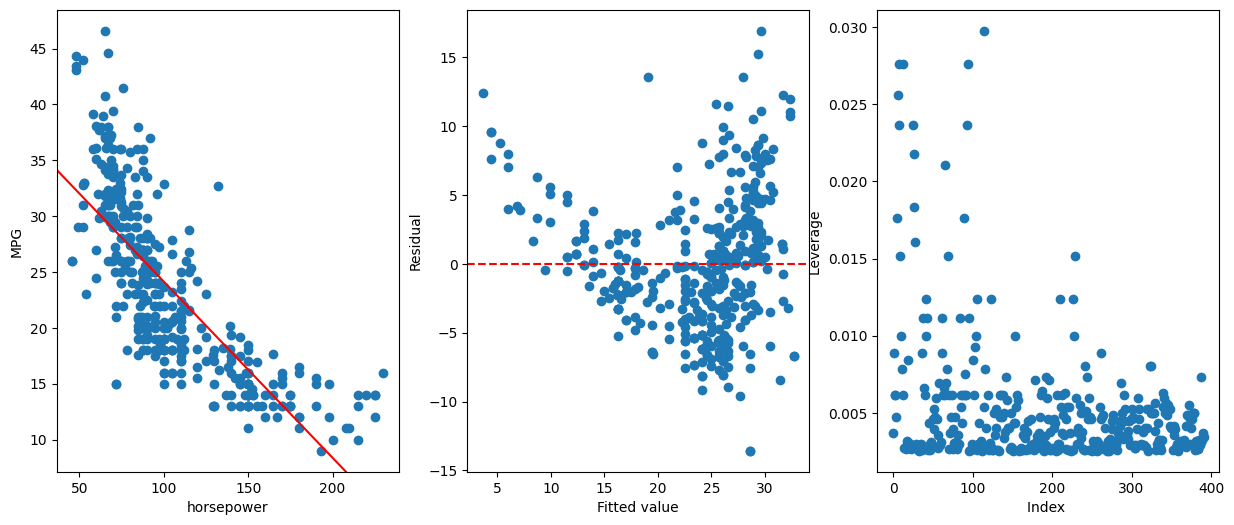

In [2]:
#8 
Auto = load_data("Auto")
Y = Auto['mpg']
X = pd.DataFrame({'intercept ': np.ones(Auto.shape[0]),
                  'horsepower ': Auto['horsepower']})
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())
# (a)
# i. The R2 indicates a relationship between the predictors and the response (60%).
# ii. The p value is 0, which indicates that the relationship is strong.
# iii. The relationship is negative, the higher the horsepower, the lower the mpg.
y = result.params.iloc[0] + 98 * result.params.iloc[1]
# iv. mpg is predicted to be 24.46 when horsepower is 98.

# (b)
fig, ax = subplots(1, 3, figsize=(15, 6))
ax[0].scatter(Auto['horsepower'], Y)
ax[0].axline(xy1=(Auto['horsepower'].mean(), Y.mean()), slope=result.params.iloc[1], c='red')
ax[0].set_xlabel('horsepower')
ax[0].set_ylabel('MPG')
# (c) The current linear fit is not very good as the data shows a polinomial relationship. This is shown further in the residuals plot, where the residuals also have a polinomial shape.
ax[1].scatter(result.fittedvalues, result.resid)
ax[1].set_xlabel('Fitted value')
ax[1].set_ylabel('Residual')
ax[1].axhline(0, c='red', ls='--')
# Calculate the leverage statistics to confirm if there are outliers for the current fit
infl = result.get_influence()
ax[2].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[2].set_xlabel('Index ')
ax[2].set_ylabel('Leverage ')
np.argmax(infl.hat_matrix_diag)


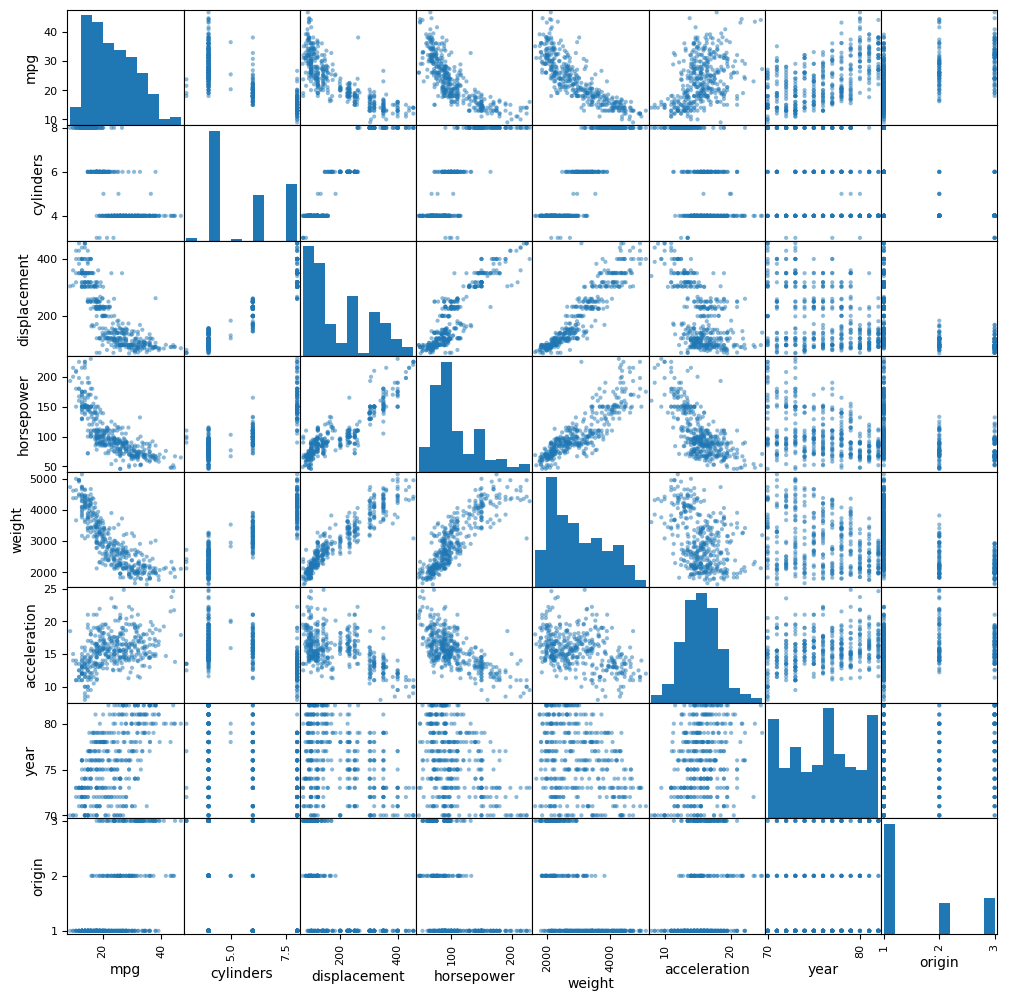

In [3]:
# 9.a
pd.plotting.scatter_matrix(Auto, figsize=(12, 12));

In [4]:
# 9.b

Auto[Auto.columns.drop('mpg')].corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [5]:
# 9.c
Auto[Auto.columns.drop('mpg')].corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [6]:
Y = Auto['mpg']
X = Auto[Auto.columns.drop('mpg', 'name')]
X['intercept'] = np.ones(X.shape[0])
model = sm.OLS(Y, X)
result = model.fit()
result.summary()
# y = result.params.iloc[0] + 98 * result.params.iloc[1]

# 9.c.ii: Using the p-value (<0.05), the variables that are significant are displacement, weight, year, and origin. The standard error of origin is notable, but it hasn't been transformed to a qualitative variable.
# 9.c.iii: It indicates that MPG has increased over the years due to the positive coefficient.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 19 Jan 2025   Prob (F-statistic):          2.04e-139
Time:                        11:44:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Leverage ')

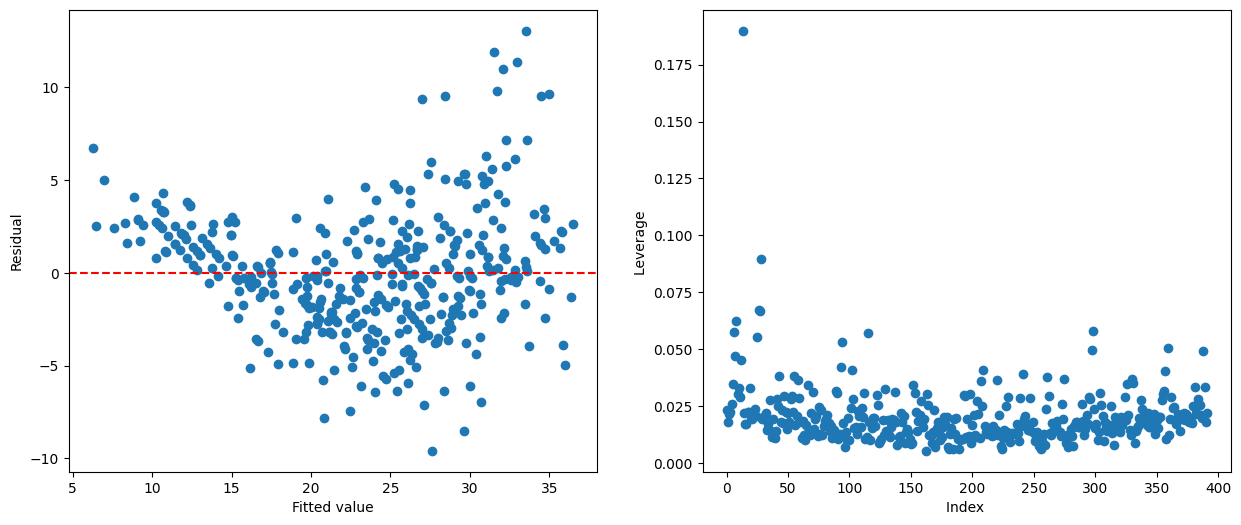

In [7]:
# 9.d
# The residuals are not normally distributed, with many outliers.
# The leverage statistics indicate that there are a few high-leverage points in particular one that is well outside the range of the other points.
fig, ax = subplots(1, 2, figsize=(15, 6))
ax[0].scatter(result.fittedvalues, result.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='red', ls='--')
# Calculate the leverage statistics to confirm if there are outliers for the current fit
infl = result.get_influence()
ax[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index ')
ax[1].set_ylabel('Leverage ')



In [8]:
# 9.e : using columns that had a relationship with Y (displacement, weight, year, and origin), the interaction between weight and displacement seems significant.
# The interaction has a low p-value and given the range of the input values, it can be significant, even if the coefficient is small. 
# There's a high correlation between weight and displacement shown in the boxplot of exercise 8.
X = MS(['displacement', 'weight', 'year', 'origin', ('displacement', 'weight'), ('displacement', 'year'),
        ('displacement', 'origin'), ('weight', 'year'), ('weight', 'origin'), ('year', 'origin'), ]).fit_transform(Auto)
Y = Auto['mpg']
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sun, 19 Jan 2025   Prob (F-statistic):          2.41e-156
Time:                        11:44:45   Log-Likelihood:                -974.75
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     381   BIC:                             2015.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             -17.9183     24.959     -0.718      0.473     -66.993      31.156
displacement            0.0338      0.083      0.408      0.684      -0.129       0.197
weight                 -0.0083      0.011     -0.740      0.460      -0.030       0.014
year                    0.9045      0.324      2.795      0.005       0.268       1.541
origin                 -5.6486      5.352     -1.055      0.292     -16.173       4.876
displacement:weight  1.806e-05   2.76e-06      6.540      0.000    1.26e-05    2.35e-05
displacement:year      -0.0016      0.001     -1.401      0.162      -0.004       0.001
displacement:origin     0.0160      0.013      1.258      0.209      -0.009       0.041
weight:year          5.751e-06      0.000      0.038      0.970      -0.000       0.000
weight:origin          -0.0013      0.001     -1.418      0.157      -0.003       0.001
year:origin             0.0946      0.066      1.429      0.154      -0.036       0.225
==============================================================================
Omnibus:                       76.322   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.097
Skew:                           0.890   Prob(JB):                     4.86e-50
Kurtosis:                       6.276   Cond. No.                     1.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              4492.
Date:                Sun, 19 Jan 2025   Prob (F-statistic):                   5.32e-270
Time:                        11:44:45   Log-Likelihood:                         -1190.2
No. Observations:                 392   AIC:                                      2384.
Df Residuals:                     390   BIC:                                      2392.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

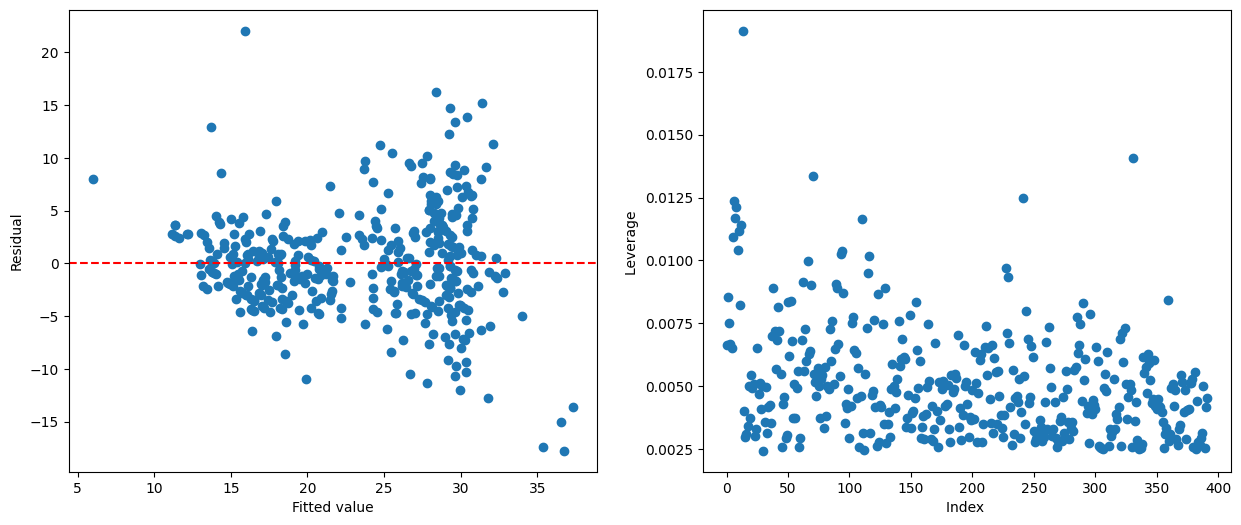

In [9]:
# 9.f
# The R-squared for the model improves significantly when using log and sqrt transformations of the predictors. Log gives the best results with an R-squared of 0.958. In contrast, the R-squared decreases when using the power transformation. This is expected as the X data is right-skewed, as shown in the boxplots of weight vs mpg and displacement vs mpg. 

fig, ax = subplots(1, 2, figsize=(15, 6))
# Run with np.log, np.sqrt and np.power
X_weight = np.log(Auto['weight'])
X_dis = np.log(Auto['displacement'])

X = pd.concat([X_weight, X_dis], axis=1)
Y = Auto['mpg']
model = sm.OLS(Y, X)
result = model.fit()
ax[0].scatter(result.fittedvalues, result.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='red', ls='--')
# Calculate the leverage statistics to confirm if there are outliers for the current fit
infl = result.get_influence()
ax[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index ')
ax[1].set_ylabel('Leverage ')
print(result.summary())



In [10]:
# 10.a
Carseats = load_data('Carseats');
Y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()
# 10.b: The model is not a good fit with an R-squared of 0.239.
#      intercept: starts at 13k units
#      Price: For every dollar increase in price, sales decrease by 54 units.
#      Urban: Urban stores sell 21 less units than rural stores.
#      US: US stores sell 1200 units more than non-US stores.

# 10.c
# Rural, abroad store = 13.043 - 0.054*Price
# Urban, abroad store = 13.043 - 0.054*Price - 0.021
# Urban, US store = 13.043 - 0.054*Price - 0.021 + 1.2

# 10.d
# Given the p-values of the predictors, the null hypothesis can be rejected for the intercept (b0), price (b1) and US (b3). It cannot be rejected for Urban (b2).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           2.39e-23
Time:                        11:44:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# 10.e
# The model without Urban has the same R-squared.
Y = Carseats['Sales']
X = MS(['Price', 'US']).fit_transform(Carseats)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           2.66e-24
Time:                        11:44:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 10.f
# The models doesn't explain the results too well. R-squared is 0.239

# 10.g.
conf_interval = result.conf_int(alpha=0.05)
print(conf_interval)


                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


Text(0, 0.5, 'Leverage ')

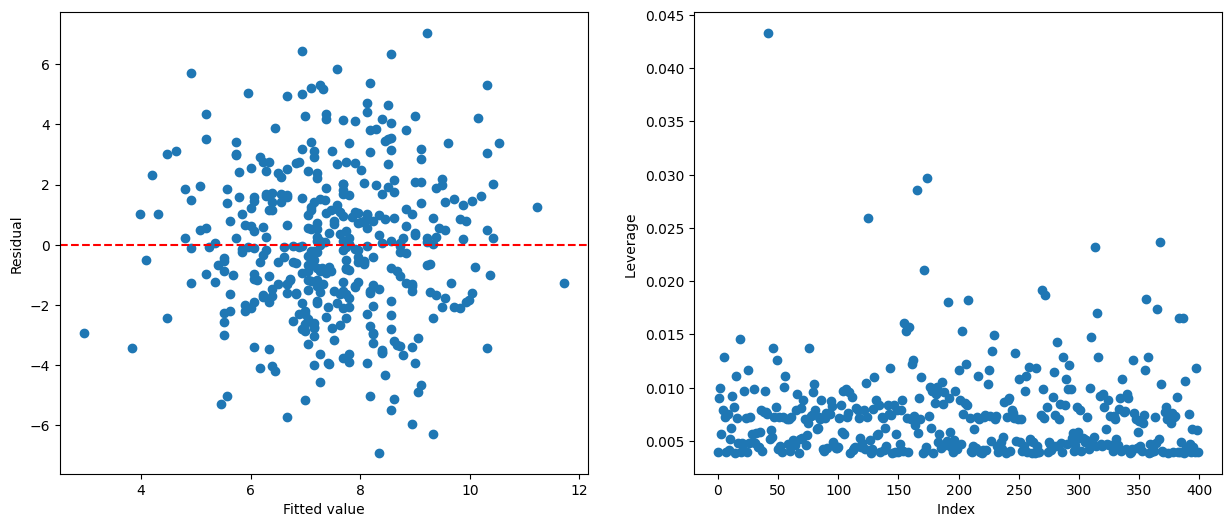

In [13]:
# 10.h
# The residual plot seems to show the residuals are not normally distributed, or there is a high std dev. The leverage plot indicates that there are a few high leverage points
fig, ax = subplots(1, 2, figsize=(15, 6))
# Run with np.log, np.sqrt an
ax[0].scatter(result.fittedvalues, result.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='red', ls='--')
infl = result.get_influence()
ax[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index ')
ax[1].set_ylabel('Leverage ')

In [14]:
# 11
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

result = sm.OLS(y, x).fit()
result.summary()
# 11.a
# Coefficient=1.97, std-error=0.117, t-stat=16.89, p-value=0.000. The value of p rejects the null hypothesis.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 19 Jan 2025   Prob (F-statistic):                    6.23e-31
Time:                        11:44:46   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

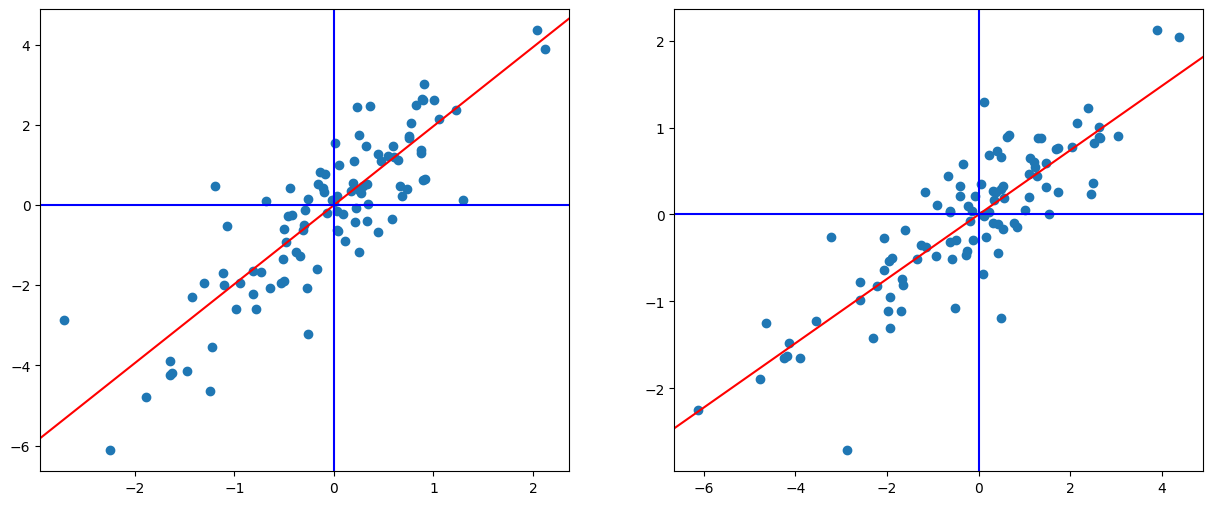

In [15]:
# 11.b
result = sm.OLS(x, y).fit()
result.summary()
# Coefficient=0.37, std-error=0.022, t-stat=16.89, p-value=0.000. The value of p rejects the null hypothesis.

# 11.c The coefficient in the 2nd regression is not 1/1.97, as the y values have noise. Swapping X and Y will not give the same result.
fig, ax = subplots(1, 2, figsize=(15, 6))
ax[0].scatter(x, y)
ax[0].axline(xy1=(0, 0), slope=1.97, c='red')
ax[0].axhline(0, c='blue')
ax[0].axvline(0, c='blue')
ax[1].scatter(y, x)
ax[1].axline(xy1=(0, 0), slope=0.37, c='red')
ax[1].axhline(0, c='blue')
ax[1].axvline(0, c='blue')

In [16]:
# 12.a
# Given the equation, the regression of x into y, and y into x will have the same coefficient when ∑xi^2 = ∑yi^2.
# 12.b
# The regression in 11.a is an example.
# 12.c
rng = np.random.default_rng(1)
x = rng.normal(size=100)
# To generate the same ∑xi^2 = ∑yi^2, we copy the X and shuffle the values.
y = x.copy()
np.random.shuffle(y)
result = sm.OLS(x, y).fit()
print(result.params)
result = sm.OLS(y, x).fit()
print(result.params)


[-0.04824457]
[-0.04824457]


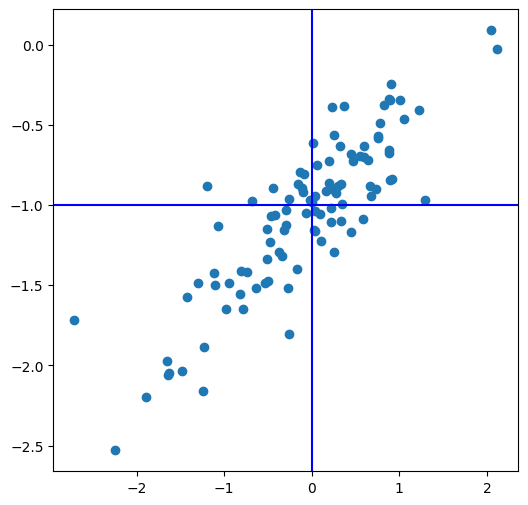

In [17]:
# 13
rng = np.random.default_rng(1)
# 13.a
x = rng.normal(size=100)
# 13.b
eps = rng.normal(size=100, scale=0.25)
# 13.c
y = -1 + 0.5 * x + eps
Data = pd.DataFrame({'y': y, 'x': x, })
# y length is 100. b0 = -1, b1 = 0.5.
# 13.d
fig, ax = subplots(figsize=(6, 6))
ax.scatter(x, y)
ax.axhline(-1, c='blue')  # centered in -1
ax.axvline(0, c='blue')
# the relationship seems linear and it's centered in (0,-1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.74e-30
Time:                        11:44:46   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.0

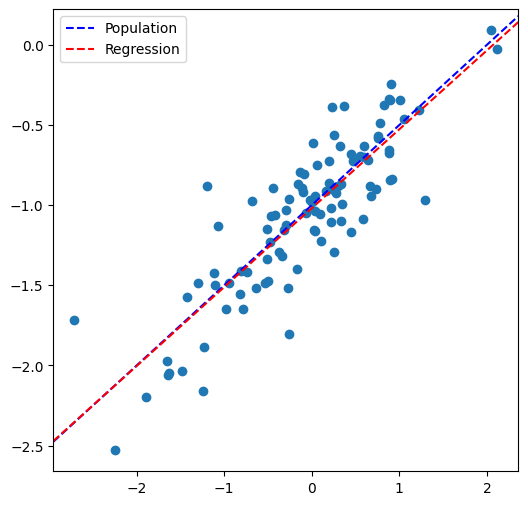

In [18]:
# 13.e
X = MS(['x']).fit_transform(Data)
Y = Data['y']
result = sm.OLS(Y, X).fit()
fig, ax = subplots(figsize=(6, 6))
ax.scatter(x, y)
ax.axline(xy1=(0, -1), slope=0.5, c='blue', ls='--', label='Population')
x_new = np.linspace(x.min(), x.max(), 100)
ax.axline(xy1=(x.mean(), y.mean()), slope=result.params['x'], c='red', ls='--', label='Regression')
ax.legend()
print(result.summary())
# The coefficients are very close to the population values. The intercept is -1.019 and the slope is 0.4921.
print(result.conf_int())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           3.66e-29
Time:                        11:53:43   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.0552 

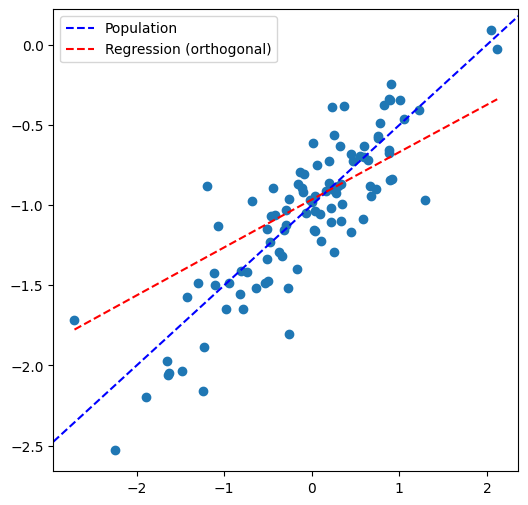

In [30]:
#13.g.
raw = False # Using orthogonal polynomials (raw=False) will give a line that is very different from the population line, but has the same R2, model and residual MSE compared to the regression with raw polynomials
Y = Data['y']
X = MS([poly('x', degree=2, raw=raw)]).fit_transform(Data, Y)
result = sm.OLS(Y, X).fit()
print(result.summary())
print(result.mse_model)
print(result.mse_resid)
fig, ax = subplots(figsize=(6, 6))
ax.scatter(Data['x'], Data['y'])
ax.axline(xy1=(0, -1), slope=0.5, c='blue', ls='--', label='Population')
x_new = np.linspace(x.min(), x.max(), 100)
X_hat = MS([poly('x', degree=2, raw=raw)]).fit_transform(pd.DataFrame({'x': x_new}))
Y_hat = result.predict(X_hat)
ax.plot(x_new, Y_hat, c='red', ls='--', label='Regression (orthogonal)')
ax.legend()

# The evidence that the cuadratic regression improves the model fit comes from the MSE. The MSE for the previous
# model is 17.56, while the MSE of the cuadratic model is 8.78. It's worth mentioning that the R-squared remains 0.741, so the model is not better at explaining the variance.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.804e+05
Date:                Sat, 18 Jan 2025   Prob (F-statistic):          8.05e-162
Time:                        20:51:05   Log-Likelihood:                 319.46
No. Observations:                 100   AIC:                            -634.9
Df Residuals:                      98   BIC:                            -629.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0008      0.001   -995.285      0.0

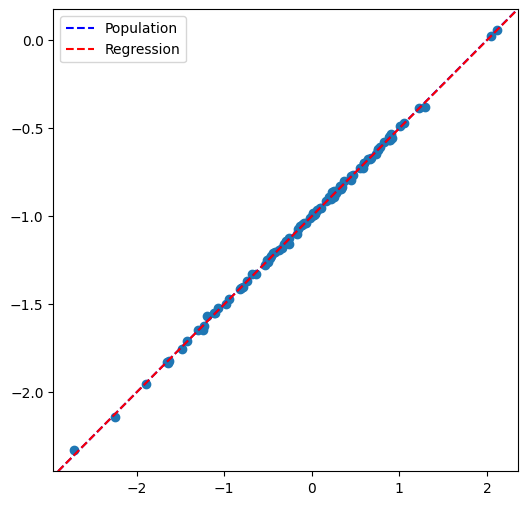

In [146]:
# 13.h
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(size=100, scale=0.01)
y = -1 + 0.5 * x + eps

Data = pd.DataFrame({'x': x})
X = MS('x').fit_transform(Data)
Y = y
result = sm.OLS(Y, X).fit()

fig, ax = subplots(figsize=(6, 6))
ax.scatter(x, y)
ax.axline(xy1=(0, -1), slope=0.5, c='blue', ls='--', label='Population')
x_new = np.linspace(x.min(), x.max(), 100)
ax.axline(xy1=(x.mean(), y.mean()), slope=result.params['x'], c='red', ls='--', label='Regression')
ax.legend()
print(result.summary())
print(result.mse_model)
print(result.mse_resid)
print(result.conf_int())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     15.87
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           0.000131
Time:                        20:51:05   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0760      0.101    -10.701      0.0

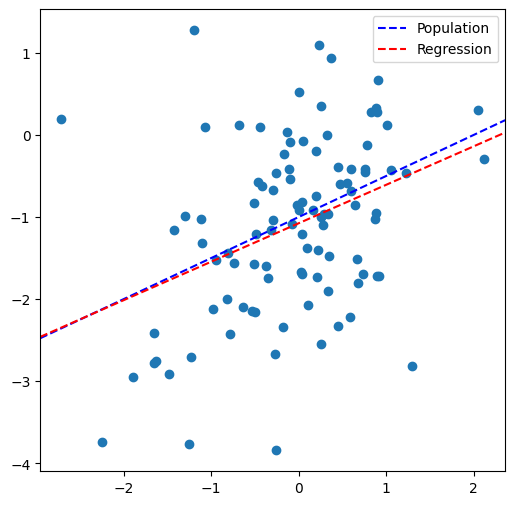

In [147]:
# 13.i
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(size=100, scale=1)
y = -1 + 0.5 * x + eps

Data = pd.DataFrame({'x': x})
X = MS('x').fit_transform(Data)
Y = y
result = sm.OLS(Y, X).fit()

fig, ax = subplots(figsize=(6, 6))
ax.scatter(x, y)
ax.axline(xy1=(0, -1), slope=0.5, c='blue', ls='--', label='Population')
x_new = np.linspace(x.min(), x.max(), 100)
ax.axline(xy1=(x.mean(), y.mean()), slope=result.params['x'], c='red', ls='--', label='Regression')
ax.legend()
print(result.summary())
print(result.mse_model)
print(result.mse_resid)

# The residual error increases the noisier the data is.
print(result.conf_int())

In [148]:
#13.j

# Less noisy:
#                   0         1
# intercept -1.002756 -0.998765
# x          0.497351  0.502020
#
# Original
#                   0         1
# intercept -1.013778 -0.993824
# x          0.486757  0.510102
#
# Noisier:
#                   0         1
# intercept -1.275564 -0.876487
# x          0.235131  0.702033
#
# The noisier the data, the more the confidence interval broadens,

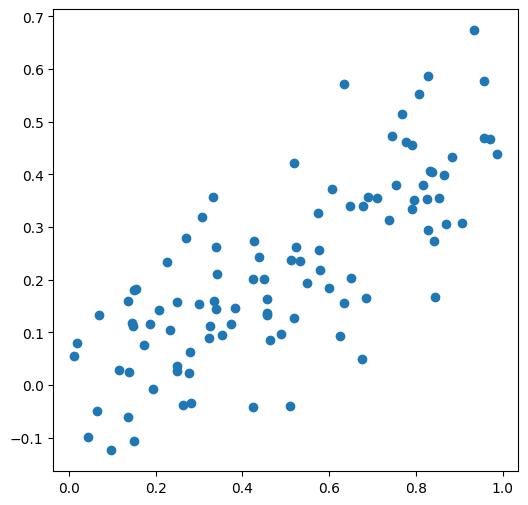

In [149]:
# 14
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
# 14.a  The linear form is y = b0 + b1*x1 + b2*x2 + eps.
#       replacing x2 in the equation we get: y = b0 + b1*x1 + b2*(0.5*x1 + eps2) + eps
#       distributing b2 we get: y = b0 + b1*x1 + 0.5*b2*x1 + b2*eps2 + eps
#       grouping x1 terms: y = b0 + (b1 + 0.5*b2)*x1 + b2*eps2 + eps
#       with coefficients b0=2, b1=2, b2=0.3, the equation is y = 2 + (2+0.5*0.3)*x1 + 0.3*eps2 + eps
#       and finally: y = 2 + 2.15*x1 + 0.3*eps2 + eps
#       and if the error terms are replaced with a new one, the equation is y = 2 + 2.15*x1 + eps

#14.b x2 is a linear function of x1 with extra noise. 
subplots(figsize=(6, 6))[1].scatter(x1, x2)

In [150]:
# 14.c
Data = pd.DataFrame({'x1': x1, 'x2': x2})
X = MS(['x1', 'x2']).fit_transform(Data)
Y = y
result = sm.OLS(Y, X).fit()
result.summary()
# b0=1.05, b1=1.61, b2=0.94. The coefficients are close to the population values. x1 seems to have the larger difference.
# The p-value of the intercept and x1 are <0.05, so the null hypothesis can be rejected.
# The p-value of x2 is 0.259 and the null hypothesis cannot be rejected.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           5.76e-08
Time:                        20:51:05   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#14.d
X = MS(['x1']).fit_transform(Data)
Y = y
result = sm.OLS(Y, X).fit()
result.summary()
# The null hypothesis can be rejected for x1 as p<0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           9.23e-07
Time:                        20:51:35   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
#14.e
X = MS(['x2']).fit_transform(Data)
Y = y
result = sm.OLS(Y, X).fit()
result.summary()
# Fitting x2 only, the null hypothesis cannot be rejected as p<0.05

#14.f
# The results in c-e don't contradict each other because they are fitting a different set of data. Fitting x1 and x2 makes it clear that x2 is not required to fit the model and that x1 is the most important predictor.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           3.13e-08
Time:                        20:51:36   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Leverage ')

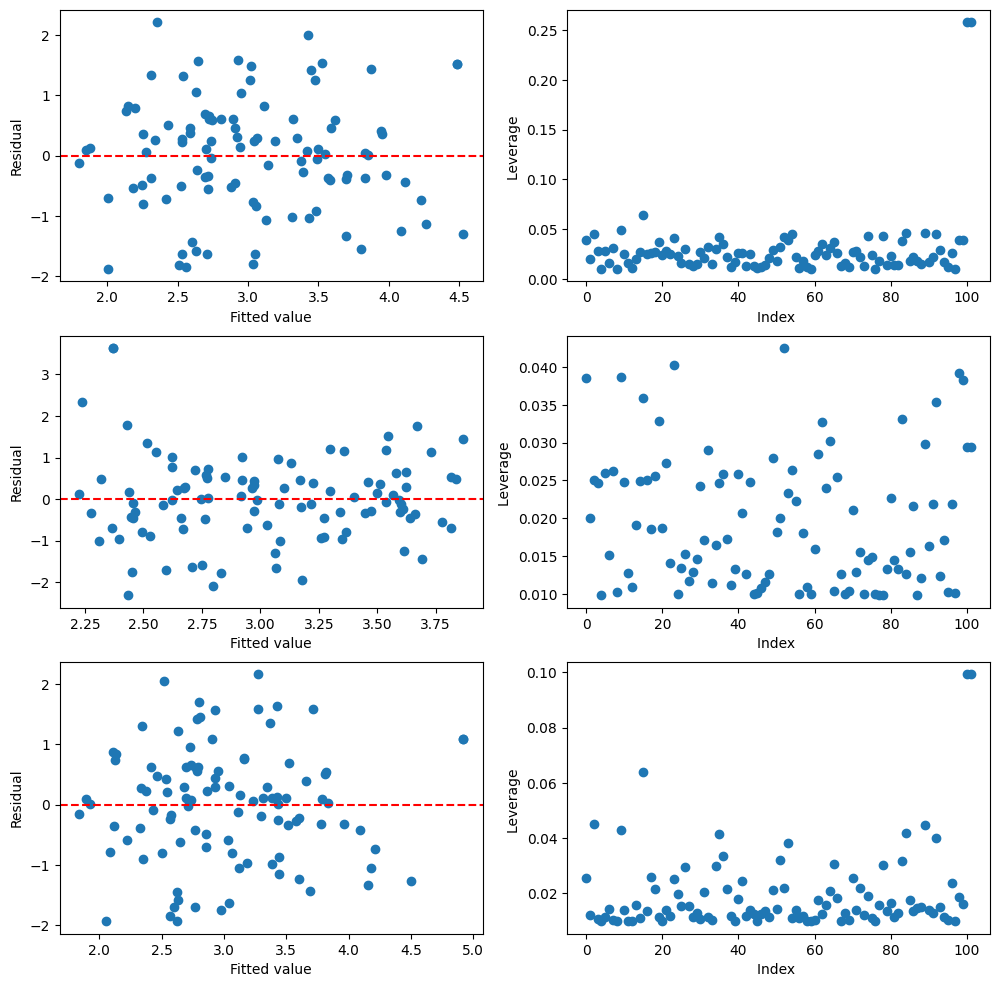

In [157]:
#14.g
# The new value is an outlier for the (x2) model, but not a high leveral point. For the models (x1,x2) and (x1)the new value is not an outlier, but it is a high leverage points
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
Data = pd.DataFrame({'x1': x1, 'x2': x2})
Y = y
X = MS(['x1', 'x2']).fit_transform(Data)
result1 = sm.OLS(Y, X).fit()
X = MS(['x1']).fit_transform(Data)
result2 = sm.OLS(Y, X).fit()
X = MS(['x2']).fit_transform(Data)
result3 = sm.OLS(Y, X).fit()
fig, ax = subplots(3, 2, figsize=(12, 12))
ax[0, 0].scatter(result1.fittedvalues, result1.resid)
ax[0, 0].set_xlabel('Fitted value')
ax[0, 0].set_ylabel('Residual')
ax[0, 0].axhline(0, c='red', ls='--')
infl = result1.get_influence()
ax[0, 1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[0, 1].set_xlabel('Index ')
ax[0, 1].set_ylabel('Leverage ')

ax[1, 0].scatter(result2.fittedvalues, result2.resid)
ax[1, 0].set_xlabel('Fitted value')
ax[1, 0].set_ylabel('Residual')
ax[1, 0].axhline(0, c='red', ls='--')
infl = result2.get_influence()
ax[1, 1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1, 1].set_xlabel('Index ')
ax[1, 1].set_ylabel('Leverage ')

ax[2, 0].scatter(result3.fittedvalues, result3.resid)
ax[2, 0].set_xlabel('Fitted value')
ax[2, 0].set_ylabel('Residual')
ax[2, 0].axhline(0, c='red', ls='--')
infl = result3.get_influence()
ax[2, 1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[2, 1].set_xlabel('Index ')
ax[2, 1].set_ylabel('Leverage ')


      zn 0.040188 0.0000
   indus 0.165310 0.0000
    chas 0.003124 0.2094
     nox 0.177217 0.0000
      rm 0.048069 0.0000
     age 0.124421 0.0000
     dis 0.144149 0.0000
     rad 0.391257 0.0000
     tax 0.339614 0.0000
 ptratio 0.084068 0.0000
   lstat 0.207591 0.0000
    medv 0.150780 0.0000


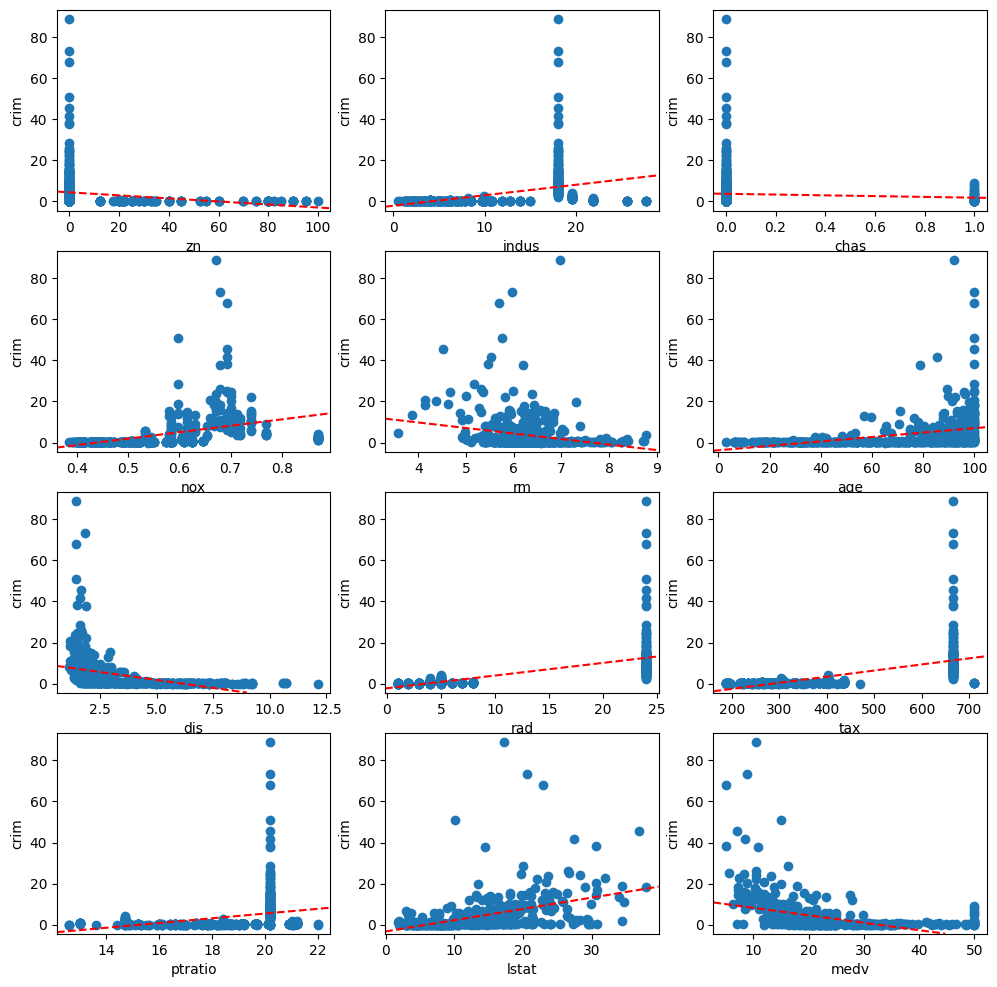

In [196]:
#15
Boston = load_data('Boston')
cols = Boston.columns.drop('crim')
Y = Boston['crim']
fig, ax = subplots(4, 3, figsize=(12, 12))
single_params = {}
for i, col in enumerate(cols):
    fig_row = i // 3
    fig_col = i % 3
    ax[fig_row, fig_col].scatter(Boston[col], Y)
    ax[fig_row, fig_col].set_xlabel(col)
    ax[fig_row, fig_col].set_ylabel('crim')
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(Y, X)
    result = model.fit()
    ax[fig_row, fig_col].axline(xy1=(Boston[col].mean(), Y.mean()), slope=result.params.iloc[1], c='red', ls='--')
    print(f'{col:>8} {result.rsquared:04f} {result.pvalues.iloc[1]:.4f}')
    single_params[col] = result.params.iloc[1]

# Based on the numbers alone, it seems all but chas have a strong relationship with crime. Looking at the scatterplots is difficult to see the relationship as the data has a strong non-linearity.


In [198]:
# 15.b
Boston = load_data('Boston')
cols = Boston.columns.drop('crim')
X = MS(cols).fit_transform(Boston)
Y = Boston['crim']
model = sm.OLS(Y, X)
result = model.fit()
multi_params = result.params
result.summary()
# Doing a regression on all predictors, the ones with a p<0.05 are: zn, dis, rad and medv. The intercept has a p-value slightly above 0.05 and lstat and nox have p-values around 0.06

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           2.03e-56
Time:                        21:57:32   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

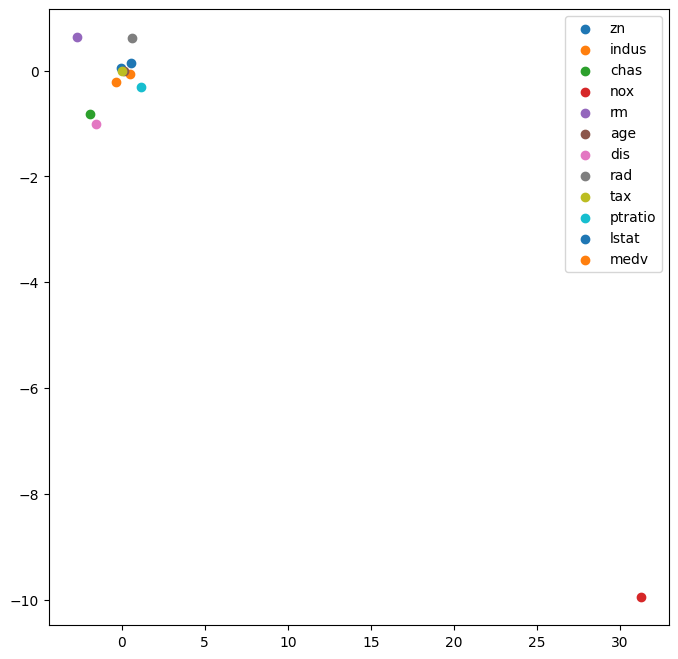

In [206]:
# 15.c
# The results are quite markedly different. Doing the multiple regression rejects most of the predictors that had a low p-value when used in isolation.
fig, ax = subplots(figsize=(8, 8))
for col in cols:
    ax.scatter(single_params[col], multi_params[col], label=col)

ax.legend()
# The univariate regression coefficients plot shows that the coefficient for nox varies considerably.

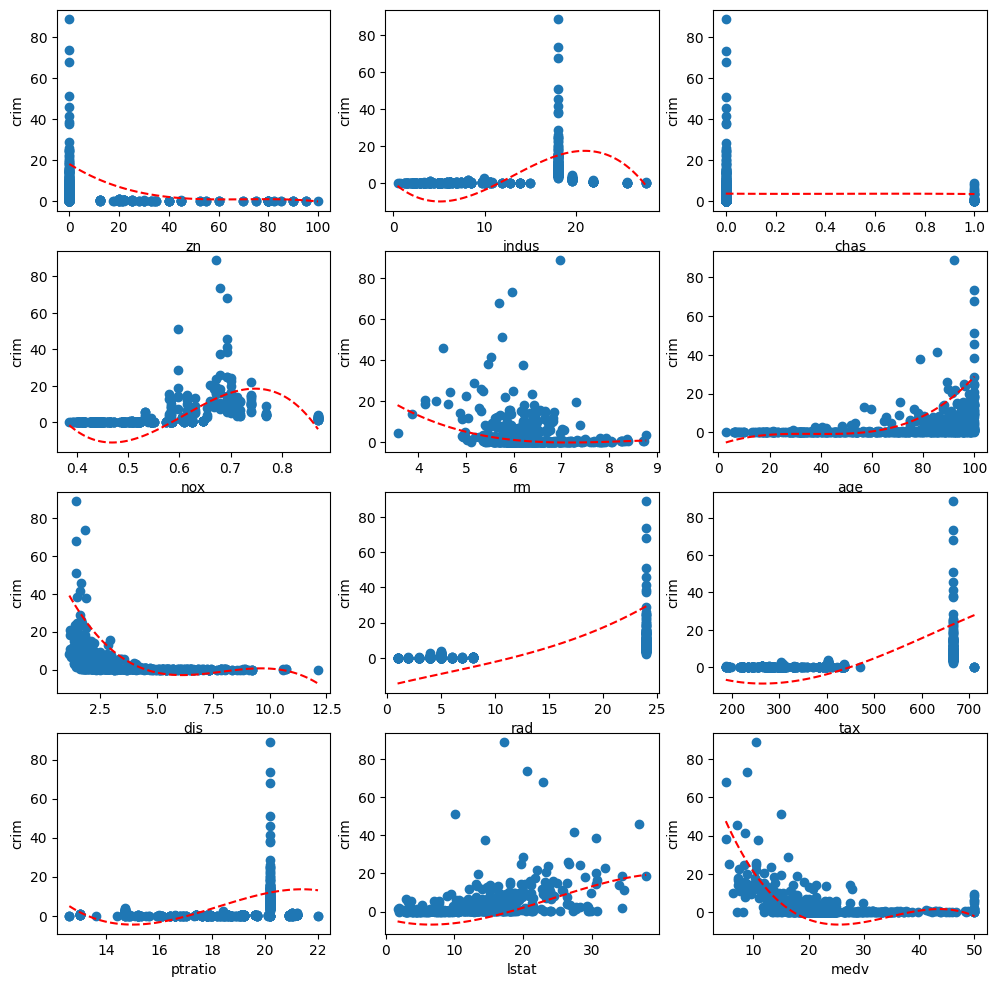

In [279]:
#15.c
Boston = load_data('Boston')
cols = Boston.columns.drop('crim')
Y = Boston['crim']
fig, ax = subplots(4, 3, figsize=(12, 12))
single_params = {}
for i, col in enumerate(cols):
    fig_row = i // 3
    fig_col = i % 3
    ax[fig_row, fig_col].scatter(Boston[col], Y)
    ax[fig_row, fig_col].set_xlabel(col)
    ax[fig_row, fig_col].set_ylabel('crim')
    X = MS([poly(col, degree=3)]).fit_transform(Boston)
    model = sm.OLS(Y, X)
    result = model.fit()
    x_pred = np.linspace(Boston[col].min(), Boston[col].max(), 100)
    X_pred = MS([poly(col, degree=3)]).fit_transform(pd.DataFrame({col: x_pred}))
    Y_pred = result.predict(X_pred)
    ax[fig_row, fig_col].plot(x_pred, Y_pred, c='red', ls='--')
    single_params[col] = result.params.iloc[1]

# For some of the predictors, the response is highly non-linear (az, indus, chas, rad, tax and ptration). The cubic regression seems to fit better in some other predictors (nox, age, dis, lstat and medv).